# Feature Selection

With bi-grams, we generate quite a lot of features from the amazon review text. I want to use this notebook to explore whether there are certain features that are more important than others so that we can reduce the dimensions of our feature matrix and improve our training time for our models

In [1]:
import pandas as pd
import operator
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# bow_infile = "dataset/feature_files/review_body-bow-df_default-ngram12-992-10020-lda20.csv"
# tfidf_infile = "dataset/feature_files/review_body-tfidf-df_default-ngram12-992-10020-lda20.csv"
bow_infile = "dataset/feature_files/review_body-bow-df_default-ngram12-111909-10020-lda20.csv"
tfidf_infile = "dataset/feature_files/review_body-tfidf-df_default-ngram12-111909-10020-lda20.csv"
bow_df = pd.read_csv(bow_infile)
bow_ys = bow_df[["star_rating", "total_votes", "helpful_votes"]]
bow_x = bow_df.drop(labels=["star_rating", "total_votes", "helpful_votes"], axis=1)
bow_x.drop(labels=[str(x) for x in range(0,20)], axis=1, inplace=True)

tfidf_df = pd.read_csv(tfidf_infile)
tfidf_ys = tfidf_df[["star_rating", "total_votes", "helpful_votes"]]
tfidf_x = tfidf_df.drop(labels=["star_rating", "total_votes", "helpful_votes"], axis=1)
tfidf_x.drop(labels=[str(x) for x in range(0,20)], axis=1, inplace=True)


# Feature Variance

If we find features that have 0 variance, may be worth while to drop as it does not add anything to our models

In [3]:
bow_dict = {key: bow_x[key].std() for key in bow_x.columns}
sorted_bow_dict = sorted(bow_dict.items(), reverse=True, key=operator.itemgetter(1))
bow_keys = [x[0] for x in sorted_bow_dict]
bow_stds = [x[1] for x in sorted_bow_dict]

tfidf_dict = {key: tfidf_x[key].std() for key in tfidf_x.columns}
sorted_tfidf_dict = sorted(tfidf_dict.items(), reverse=True, key=operator.itemgetter(1))
tfidf_keys = [x[0] for x in sorted_tfidf_dict]
tfidf_stds = [x[1] for x in sorted_tfidf_dict]

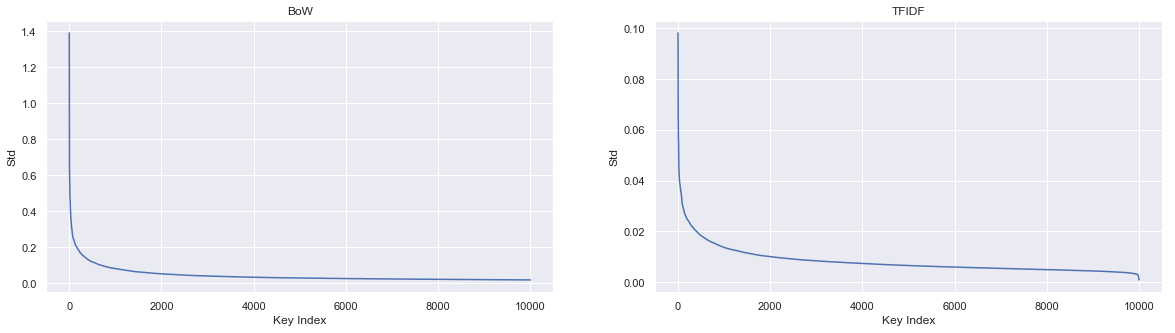

In [4]:
f, a = plt.subplots(1, 2, figsize=(20,5))
_ = sns.lineplot(x=range(0,len(bow_stds)), y=bow_stds, ax=a[0])
_ = a[0].set_title("BoW")
_ = a[0].set_xlabel("Key Index")
_ = a[0].set_ylabel("Std")


_ = sns.lineplot(x=range(0,len(tfidf_stds)), y=tfidf_stds, ax=a[1])
_ = a[1].set_title("TFIDF")
_ = a[1].set_xlabel("Key Index")
_ = a[1].set_ylabel("Std")

## Looks to be a few features in TFIDF that have 0 variance. We can probably get rid of those. For BoW, there may be some at the tail end that have the same variance. Looking further

In [ ]:
# get a count of variables with the lowest variance
bow_std_min = min(bow_stds)
bow_min_keys = [bow_keys[x] for x in range(len(bow_stds)) if bow_stds[x] == bow_std_min]
print(f"Minimum BoW Standard Deviation: {bow_std_min}")
bow_min_keys

Minimum BoW Standard Deviation: 0.019137349602017472


['always used']

In [ ]:
# get a count of variables with the lowest variance
bow_std_max = max(bow_stds)
bow_max_keys = [bow_keys[x] for x in range(len(bow_stds)) if bow_stds[x] == bow_std_max]
print(f"Maximum BoW Standard Deviation: {bow_std_max}")
bow_max_keys

Maximum BoW Standard Deviation: 1.3907722575861972


['not']

/Users/vinceluk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


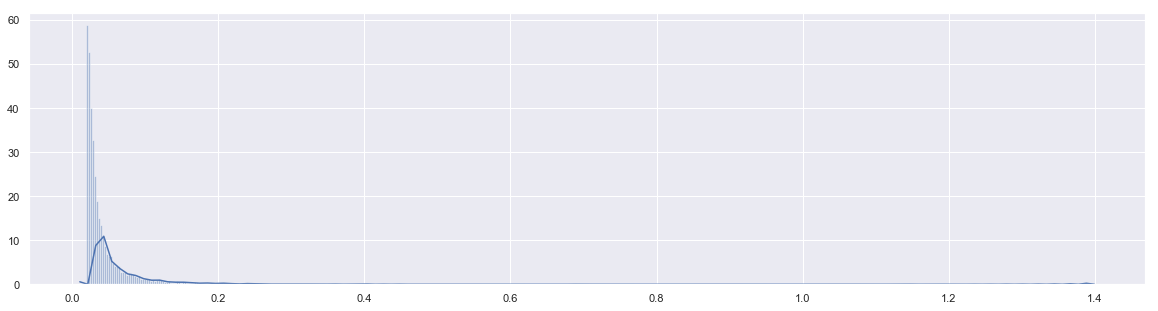

In [ ]:
f, a = plt.subplots(1, 1, figsize=(20,5))
sns.distplot(bow_stds, bins=500, ax=a)

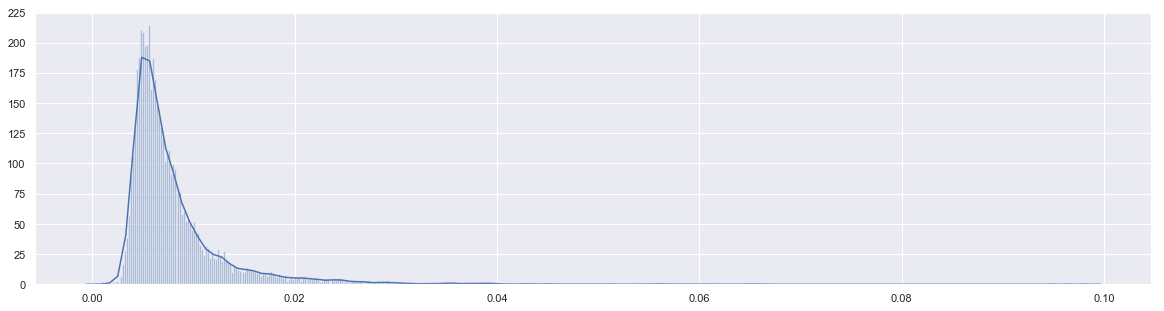

In [ ]:
f, a = plt.subplots(1, 1, figsize=(20,5))
sns.distplot(tfidf_stds, bins=500, ax=a)

In [ ]:
tfidf_std_min = min(tfidf_stds)
tiidf_min_keys = [tfidf_keys[x] for x in range(len(tfidf_stds)) if tfidf_stds[x] == tfidf_std_min]
print(f"Minimum TFIDF Standard Deviation: {tfidf_std_min}")
tiidf_min_keys

Minimum TFIDF Standard Deviation: 0.0008246276315895364


['head kg', 'kg body']

In [ ]:
tfidf_std_max = max(tfidf_stds)
tiidf_max_keys = [tfidf_keys[x] for x in range(len(tfidf_stds)) if tfidf_stds[x] == tfidf_std_max]
print(f"Maximum TFIDF Standard Deviation: {tfidf_std_max}")
tiidf_max_keys

Maximum TFIDF Standard Deviation: 0.09817320967016183


['love']

### Looks like we do not have any columns with 0 variance

# Pairwise Correlations

Let's look at if we have any variables that are highly correlated. We will use 0.65 as a threshold

In [ ]:
# BoW correlation matrix
bow_corrMatrix = bow_x.corr()

In [5]:
print(bow_corrMatrix.shape)
f, a = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(data=bow_corrMatrix)
# print(type(bow_corrMatrix))
# print(bow_corrMatrix)
# print(bow_corrMatrix.keys)
# print(bow_corrMatrix)
# corrTol = 0.65
# for col in corrMatrix:
#     if col in corrMatrix.keys():
#         thisCol = []
#         thisVars = []
        
#         # store corr with dep var for fields that are highly correlated with each other
#         for i in range(len(corrMatrix)):
#             if abs(corrMatrix[col][i]) == 1.0 and col != corrMatrix.keys()[i]:
#                 thisCorr = 0
#             else:
#                 thisCorr = (1 if abs(corrMatrix[col][i] > corrTol else -1)) * abs(temp[corrMatrix.keys()[i]])
#             thisCol.append(thisCorr)
#             thisVars.append(corrMatrix.keys()[i])
            
#         mask = np.ones(len(thisCorr)), dtype = bool)
        
#         print(mask)

(10023, 10023)


Error in callback <function flush_figures at 0x11361f598> (for post_execute):


KeyboardInterrupt: 